In [85]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
names = [
    'timestamp','gender','age','csornot','us','ethicscourse','degree','email','tosread','declined','usepersonaldata','willyoupay','whopays','delete','comments'
]

data = pd.read_csv('./report/ethics_survey_results.csv', names=names)
data.head()

,timestamp,gender,age,csornot,us,ethicscourse,degree,email,tosread,declined,usepersonaldata,willyoupay,whopays,delete,comments
0,Timestamp,[Your Gender:],[Your Age:],[Do you study/work in the Computer Science do...,[Do you live in the US?],[Have you studied any course on ethics?],[What is the highest degree you hold?],Which email service do you personally use most...,Did you read the Terms of Service and Privacy ...,Have you ever declined such an account because...,"Do you know if your email service (Gmail, Yaho...",If Gmail or other email service offers its ser...,Offering free email service costs money (payin...,How do you delete your emails/data permanently?,"Comments, if any? Suggestions?"
1,2020/10/25 10:37:18 AM EST,Male,31-40 yrs,Yes,Yes,Yes,Masters or PhD,Gmail,"No, I did not read.",I “almost” quit service after reading ToS but ...,They use my personal data.,I would use a free version with reduced privac...,"I pay, by offering my data.",I wouldn't want to delete anything from my mai...,NaN
2,2020/10/26 6:15:59 PM EST,Male,31-40 yrs,Yes,Yes,Yes,Masters or PhD,Gmail;Outlook,"No, I did not read.",No,I don't know,$11-$100 per annum,The company offering email service pays.,"Select, delete and also delete from trash.",Daniel Linares - dlinares@vt.edu
3,2020/10/26 6:19:16 PM EST,Female,21-30 yrs,Yes,Yes,Yes,Bachelors,Gmail,"Yes, but I only glanced.","Since I needed an email, I had to agree.",They use my personal data.,I would use a free version with reduced privac...,"I pay, by offering my data.",I don't know.,NaN
4,2020/10/26 7:34:53 PM EST,Male,21-30 yrs,Yes,Yes,Yes,Bachelors,Gmail,"No, I did not read.","Since I needed an email, I had to agree.",I don't know,upto $10 per annum,The company offering email service pays.,I don't know.,"Hye Sung Moon, mhss5458@vt.edu"


In [47]:
data = data[1:]

In [48]:
data.head()

,timestamp,gender,age,csornot,us,ethicscourse,degree,email,tosread,declined,usepersonaldata,willyoupay,whopays,delete,comments
1,2020/10/25 10:37:18 AM EST,Male,31-40 yrs,Yes,Yes,Yes,Masters or PhD,Gmail,"No, I did not read.",I “almost” quit service after reading ToS but ...,They use my personal data.,I would use a free version with reduced privac...,"I pay, by offering my data.",I wouldn't want to delete anything from my mai...,NaN
2,2020/10/26 6:15:59 PM EST,Male,31-40 yrs,Yes,Yes,Yes,Masters or PhD,Gmail;Outlook,"No, I did not read.",No,I don't know,$11-$100 per annum,The company offering email service pays.,"Select, delete and also delete from trash.",Daniel Linares - dlinares@vt.edu
3,2020/10/26 6:19:16 PM EST,Female,21-30 yrs,Yes,Yes,Yes,Bachelors,Gmail,"Yes, but I only glanced.","Since I needed an email, I had to agree.",They use my personal data.,I would use a free version with reduced privac...,"I pay, by offering my data.",I don't know.,NaN
4,2020/10/26 7:34:53 PM EST,Male,21-30 yrs,Yes,Yes,Yes,Bachelors,Gmail,"No, I did not read.","Since I needed an email, I had to agree.",I don't know,upto $10 per annum,The company offering email service pays.,I don't know.,"Hye Sung Moon, mhss5458@vt.edu"
5,2020/10/26 7:36:04 PM EST,Female,>50 yrs,Yes,Yes,Yes,Bachelors,Gmail,"No, I did not read.","Since I needed an email, I had to agree.",They use my personal data.,$11-$100 per annum,"I pay, by offering my data.",You can never permanently delete your data in ...,NaN


In [49]:
data.shape

(72, 15)

In [50]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["gender_code"] = lb_make.fit_transform(data["gender"])
data[["gender", "gender_code"]].head(11)

,gender,gender_code
1,Male,1
2,Male,1
3,Female,0
4,Male,1
5,Female,0
6,Female,0
7,Male,1
8,Male,1
9,Male,1
10,Male,1


In [51]:
# 'age','csornot','us','ethicscourse','degree','email','tosread','declined','usepersonaldata','willyoupay','whopays','delete','comments'
data["age_code"] = lb_make.fit_transform(data["age"])
data["csornot_code"] = lb_make.fit_transform(data["csornot"])
data["us_code"] = lb_make.fit_transform(data["us"])
data["ethicscourse_code"] = lb_make.fit_transform(data["ethicscourse"])
# data["email_code"] = lb_make.fit_transform(data["email"])
data["tosread_code"] = lb_make.fit_transform(data["tosread"])
data["declined_code"] = lb_make.fit_transform(data["declined"])
data["willyoupay_code"] = lb_make.fit_transform(data["willyoupay"])
data["whopays_code"] = lb_make.fit_transform(data["whopays"])
data["delete_code"] = lb_make.fit_transform(data["delete"])

In [175]:
data.columns

Index(['timestamp', 'gender', 'age', 'csornot', 'us', 'ethicscourse', 'degree',
       'email', 'tosread', 'declined', 'usepersonaldata', 'willyoupay',
       'whopays', 'delete', 'comments', 'gender_code', 'age_code',
       'csornot_code', 'us_code', 'ethicscourse_code', 'tosread_code',
       'declined_code', 'willyoupay_code', 'whopays_code', 'delete_code',
       'Live in USA', 'Reading Terms and Conditions', 'Taken ethics course?'],
      dtype='object')

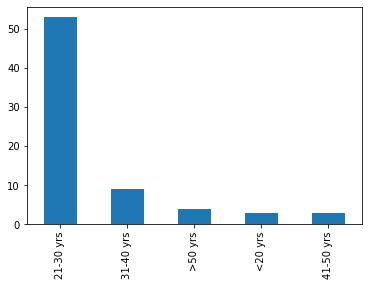

In [53]:
data.age.value_counts().plot(kind='bar')

In [54]:
age = pd.Series([3,43,7,3,4], index =['<20yrs','21-30yrs','31-40yrs','41-50yrs','>50yrs']) 

Text(0, 0.5, '')

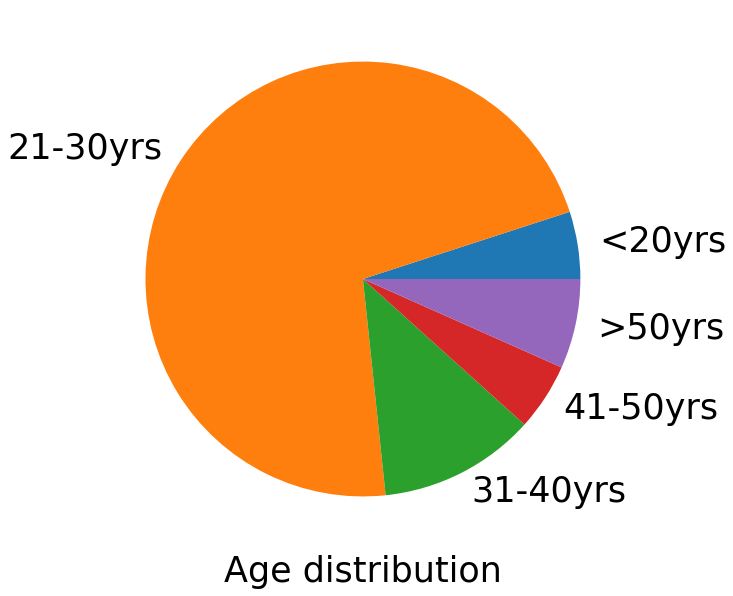

In [55]:
ax = age.plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("Age distribution",fontsize=35)
ax.set_ylabel("",fontsize=35)

Text(0, 0.5, '')

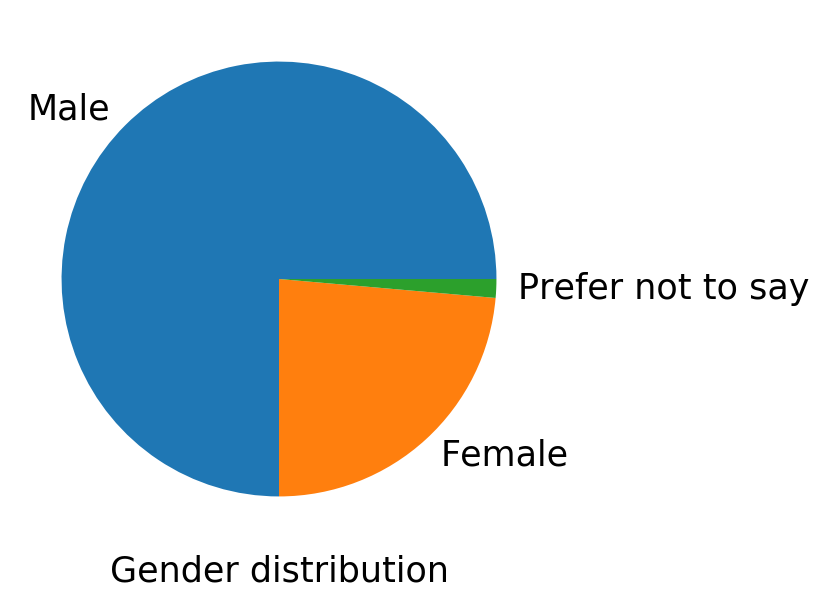

In [56]:
ax = data.gender.value_counts().plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("Gender distribution",fontsize=35)
ax.set_ylabel("",fontsize=35)

Text(0, 0.5, '')

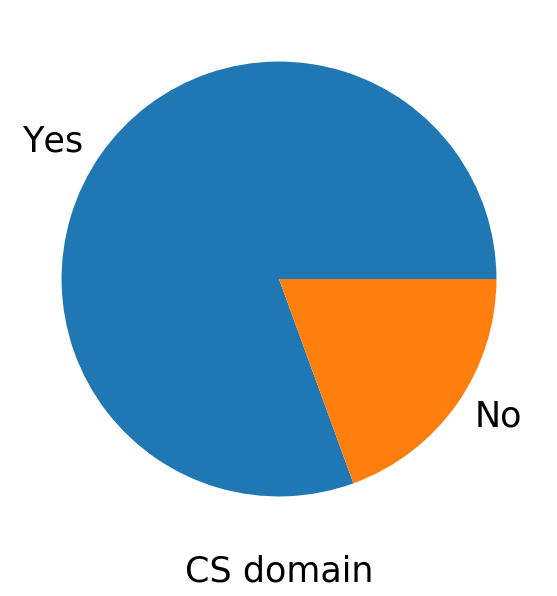

In [57]:
ax = data.csornot.value_counts().plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("CS domain",fontsize=35)
ax.set_ylabel("",fontsize=35)

Text(0, 0.5, '')

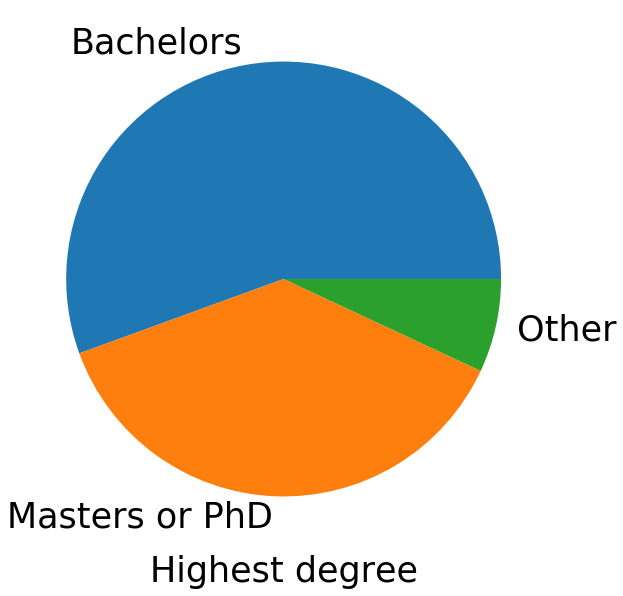

In [58]:
ax = data.degree.value_counts().plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("Highest degree",fontsize=35)
ax.set_ylabel("",fontsize=35)

Text(0, 0.5, '')

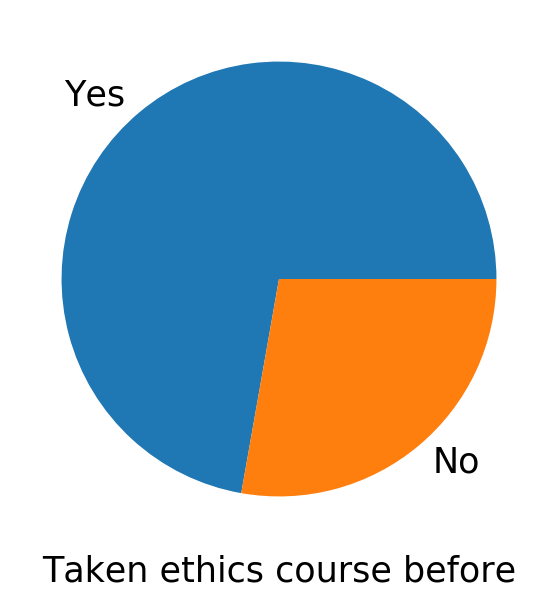

In [59]:
ax = data.ethicscourse.value_counts().plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("Taken ethics course before",fontsize=35)
ax.set_ylabel("",fontsize=35)

Text(0, 0.5, '')

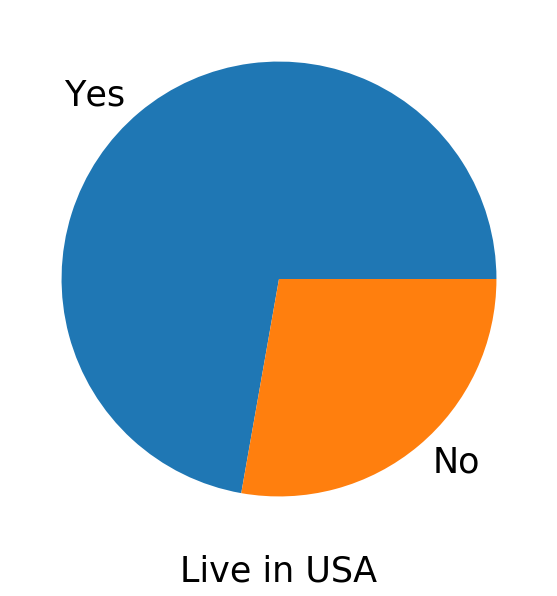

In [60]:
ax = data.us.value_counts().plot(fontsize=35,figsize=(10,10),kind='pie')
ax.set_xlabel("Live in USA",fontsize=35)
ax.set_ylabel("",fontsize=35)

In [65]:
data.columns

Index(['timestamp', 'gender', 'age', 'csornot', 'us', 'ethicscourse', 'degree',
       'email', 'tosread', 'declined', 'usepersonaldata', 'willyoupay',
       'whopays', 'delete', 'comments', 'gender_code', 'age_code',
       'csornot_code', 'us_code', 'ethicscourse_code', 'tosread_code',
       'declined_code', 'willyoupay_code', 'whopays_code', 'delete_code'],
      dtype='object')

Text(0, 0.5, '')

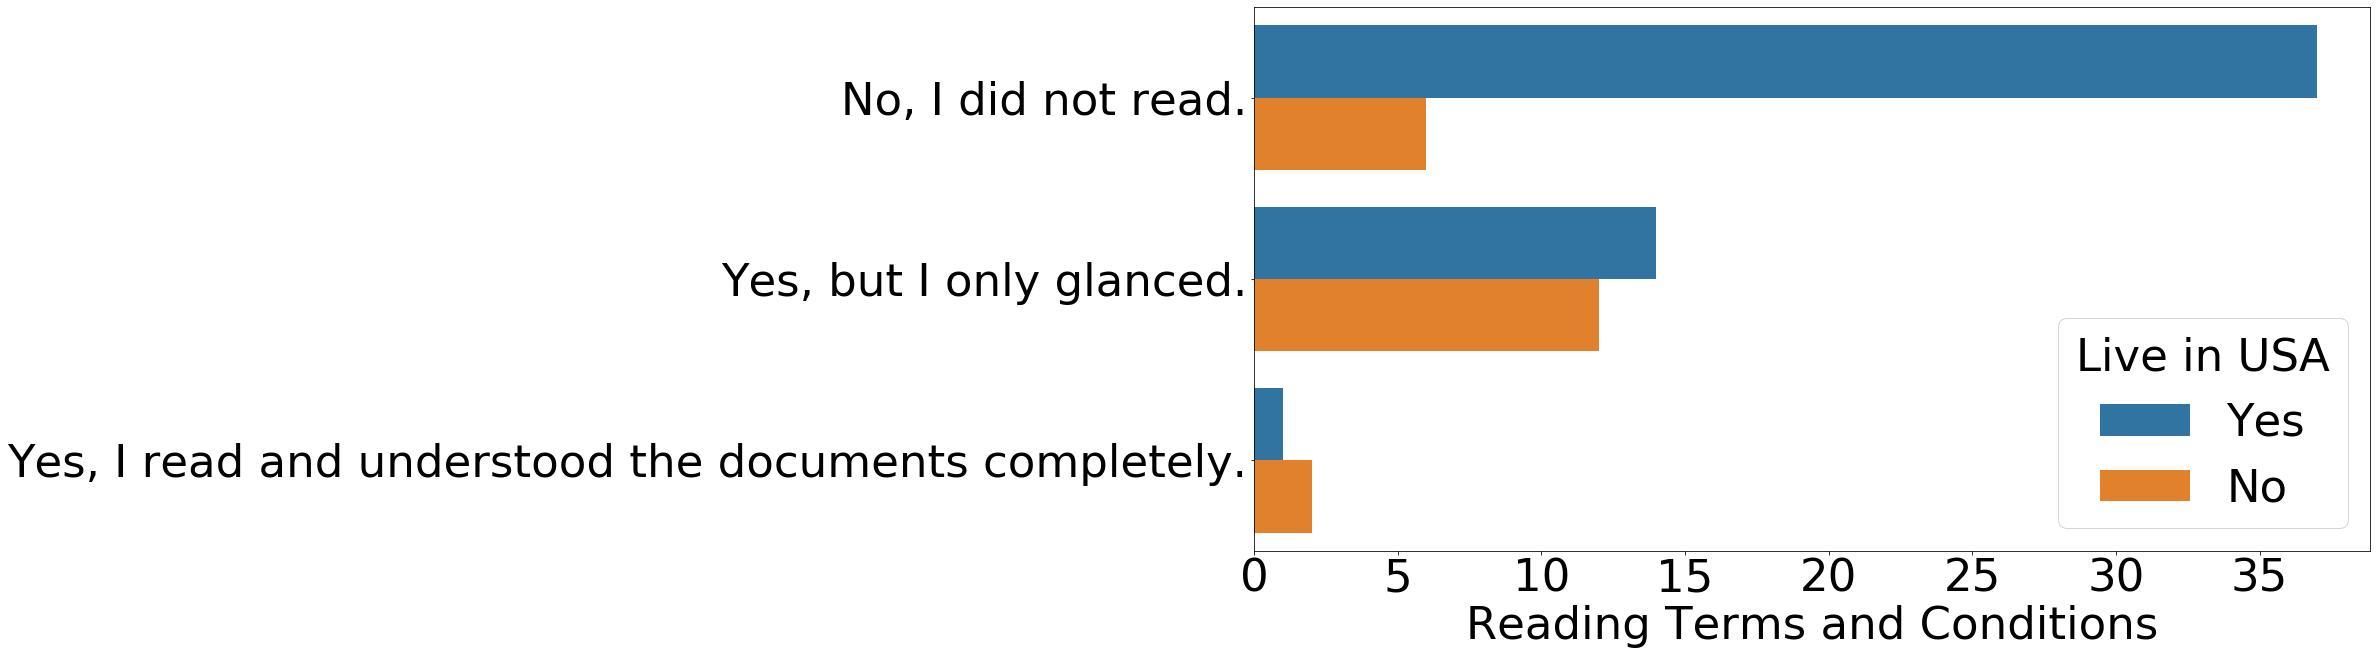

In [92]:
plt.rcParams.update({'font.size': 45})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y='Reading Terms and Conditions', hue='Live in USA', data=data,ax =ax)
ax.set_xlabel("Reading Terms and Conditions")
ax.set_ylabel("")

In [75]:
data[['us','tosread']]

,us,tosread
1,Yes,"No, I did not read."
2,Yes,"No, I did not read."
3,Yes,"Yes, but I only glanced."
4,Yes,"No, I did not read."
5,Yes,"No, I did not read."
...,...,...
68,Yes,"No, I did not read."
69,Yes,"No, I did not read."
70,Yes,"No, I did not read."
71,Yes,"Yes, but I only glanced."


In [114]:
data.groupby(['us'])['tosread'].value_counts(normalize=True)

us   tosread                                             
No   Yes, but I only glanced.                                0.600000
     No, I did not read.                                     0.300000
     Yes, I read and understood the documents completely.    0.100000
Yes  No, I did not read.                                     0.711538
     Yes, but I only glanced.                                0.269231
     Yes, I read and understood the documents completely.    0.019231
Name: tosread, dtype: float64

In [156]:
data.columns

Index(['timestamp', 'gender', 'age', 'csornot', 'us', 'ethicscourse', 'degree',
       'email', 'tosread', 'declined', 'usepersonaldata', 'willyoupay',
       'whopays', 'delete', 'comments', 'gender_code', 'age_code',
       'csornot_code', 'us_code', 'ethicscourse_code', 'tosread_code',
       'declined_code', 'willyoupay_code', 'whopays_code', 'delete_code',
       'Live in USA', 'Reading Terms and Conditions', 'Taken ethics course?'],
      dtype='object')

Text(0, 0.5, '')

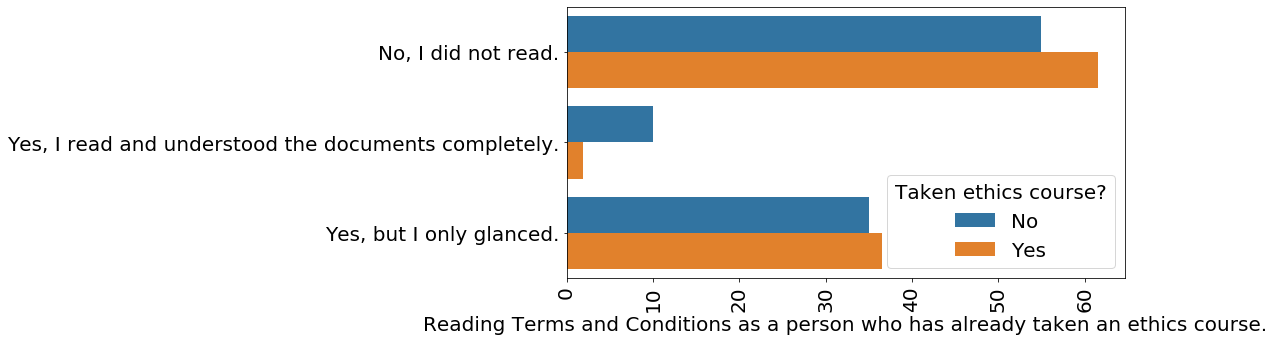

In [171]:
# x,y = data.tosread, data.us
# fig, ax = plt.subplots(figsize=(20,10))
# (data
# .groupby(['us'])['tosread']
# .value_counts(normalize=True)
# .mul(100)
# .rename('percent')
# .reset_index()
# .pipe((sns.countplot,'data'), x=x,hue=y,ax=ax,orient='h'))

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(10,5))
occupation_counts = (data.groupby(['Taken ethics course?'])['Reading Terms and Conditions']
                     .value_counts(normalize=True)
                     .rename('Normalized count')
                     .mul(100)
                     .reset_index()
                     .sort_values('Reading Terms and Conditions'))
p = sns.barplot(x="Normalized count", y="Reading Terms and Conditions", hue="Taken ethics course?", data=occupation_counts,ax =ax)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
ax.set_xlabel("Reading Terms and Conditions as a person who has already taken an ethics course.")
ax.set_ylabel("")

In [80]:
data.us.value_counts(normalize=True)

Yes    0.722222
No     0.277778
Name: us, dtype: float64

In [121]:
data['Taken ethics course?'] = data.ethicscourse

Text(0, 0.5, '')

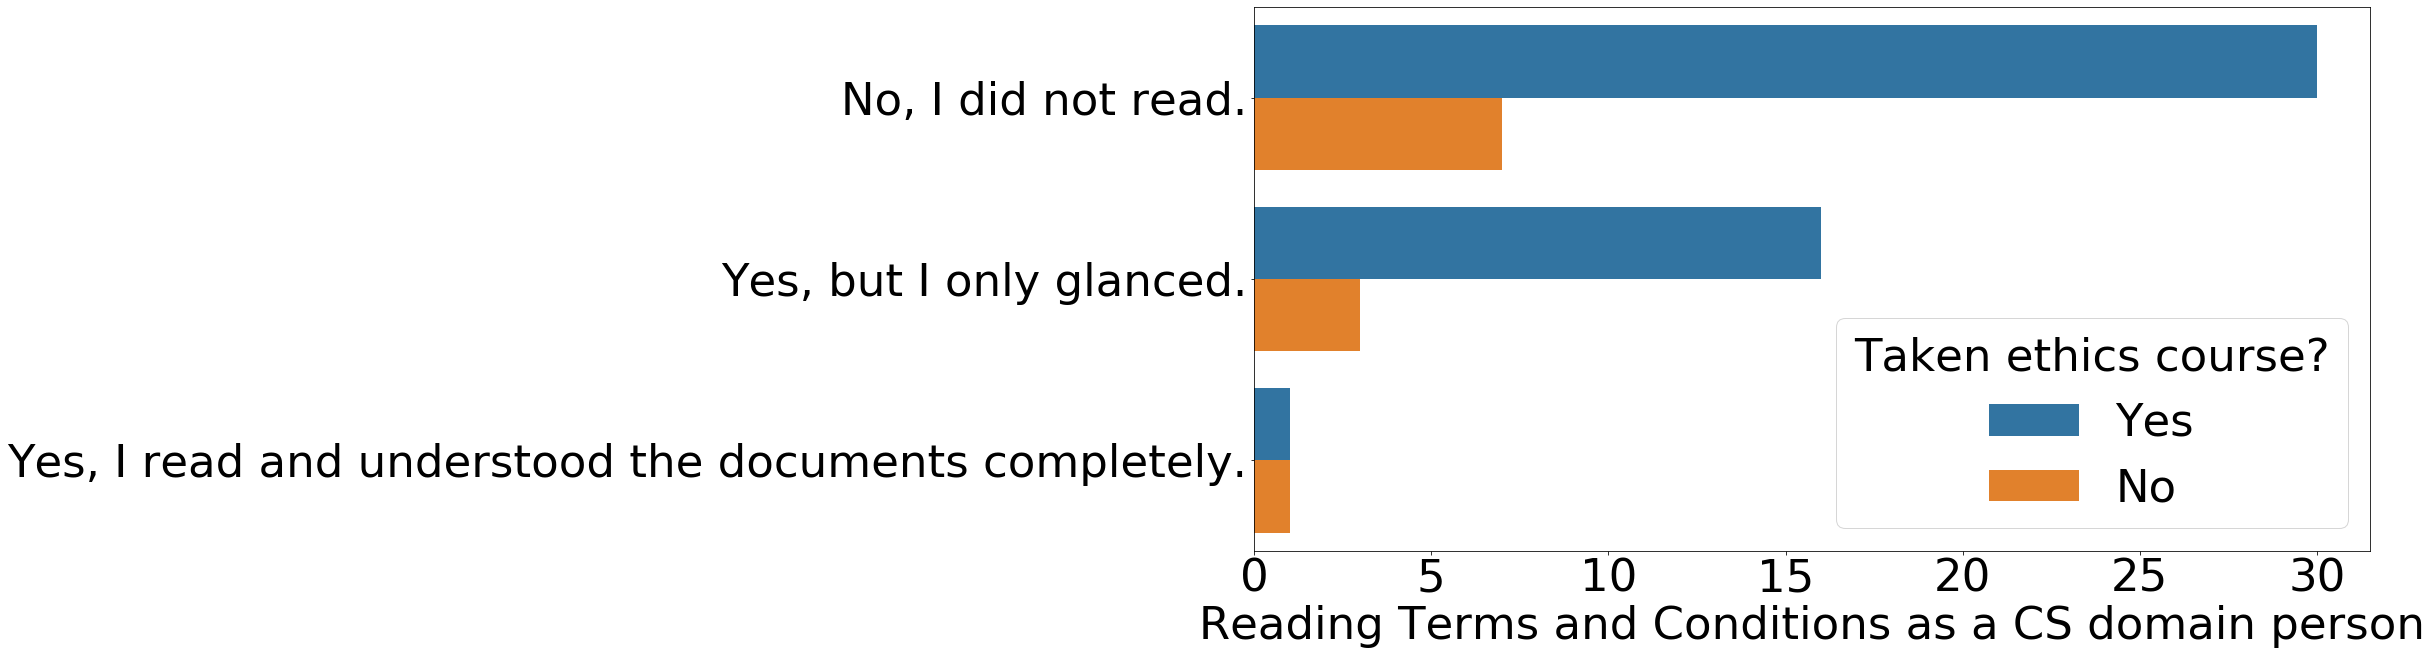

In [123]:
plt.rcParams.update({'font.size': 45})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y='Reading Terms and Conditions', hue='Taken ethics course?', data=data[data.csornot=='Yes'],ax =ax)
ax.set_xlabel("Reading Terms and Conditions as a CS domain person")
ax.set_ylabel("")

In [124]:
data[data.csornot=='Yes'].shape

(58, 28)

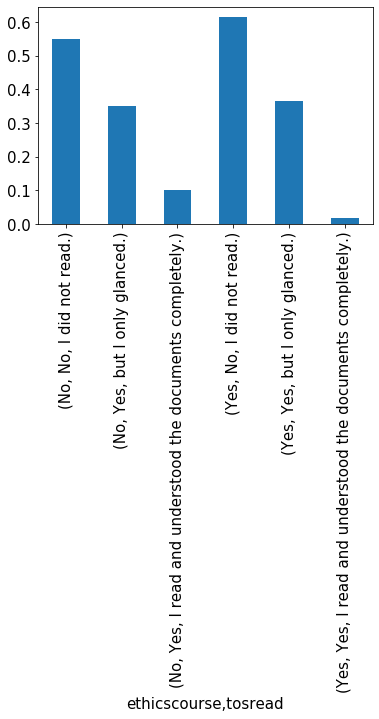

In [146]:
plt.rcParams.update({'font.size': 15})
data.groupby(['ethicscourse'])['tosread'].value_counts(normalize=True).plot(kind='bar')

In [136]:
data.groupby(['ethicscourse']).count()['tosread']

ethicscourse
No     20
Yes    52
Name: tosread, dtype: int64

In [183]:
data.ethicscourse.value_counts(normalize=True)

Yes    0.722222
No     0.277778
Name: ethicscourse, dtype: float64

In [180]:
data.us.value_counts(normalize=True)

Yes    0.722222
No     0.277778
Name: us, dtype: float64

In [181]:
data.csornot.value_counts(normalize=True)

Yes    0.805556
No     0.194444
Name: csornot, dtype: float64

In [182]:
data.degree.value_counts(normalize=True)

Bachelors         0.555556
Masters or PhD    0.375000
Other             0.069444
Name: degree, dtype: float64